{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False))])),
                ('model', RandomForestRegressor(random_state=42))])

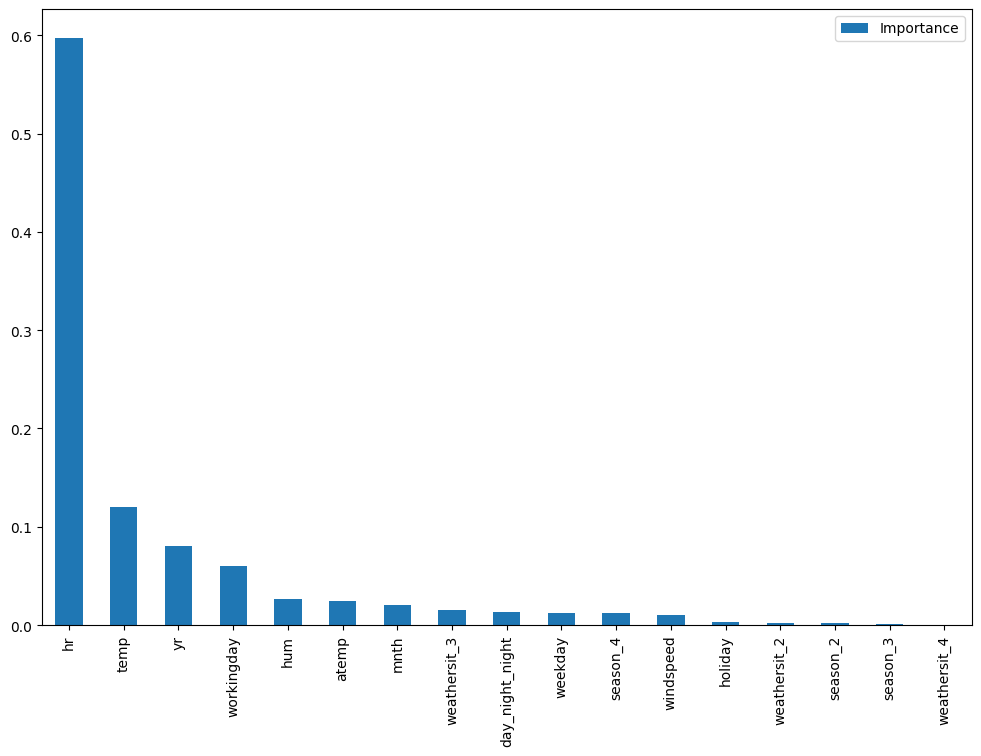

In [1]:
# -*- coding: utf-8 -*-
"""MLOps_Assignment 2.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wlj2ZTmXTltFCjkjEi36yCtLIG1jc_c-


"""

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)

!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

import pandas as pd

df = pd.read_csv('hour.csv')
df

df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)
# Separating features and target variable
X = df.drop(columns=['cnt']) # Features
y = df['cnt'] # Target

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
# Numerical features
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')), # Impute missing values with mean
('scaler', MinMaxScaler()) # Normalize using MinMaxScaler
])
# Transforming above
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])
# Categorical features
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])

# Transforming categorical features
X_encoded = categorical_pipeline.fit_transform(X[categorical_features])

# Converting it to a dataframe
X_encoded = pd.DataFrame(
    X_encoded,
    columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features)
)

# Combine encoded categorical features with numerical features
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

# Split the data (20:80 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Plotting each feature importance
feat_importances.plot(kind='bar', figsize=(12,8))

# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the final pipeline
final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Configure pipeline display to 'diagram'
set_config(display='diagram')

# Display the pipeline
final_pipeline

**Assignment 02**


1. Create at least two new interaction features between numerical variables (e.g.,
temp * hum). Justify your choice of features and explain how they might
improve the model's predictive performance.


In [2]:
# Create interaction features
df['temp_hum'] = df['temp'] * df['hum']
df['temp_windspeed'] = df['temp'] * df['windspeed']

# Add these interaction features to the numerical features list
numerical_features = ['temp', 'hum', 'windspeed', 'temp_hum', 'temp_windspeed']

# Update the numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Transform the numerical features
X[numerical_features] = numerical_pipeline.fit_transform(df[numerical_features])

# Continue with the rest of the pipeline...

print(df.head())



  season yr mnth hr holiday weekday workingday weathersit  temp   atemp   hum  \
0      1  0    1  0       0       6          0          1  0.24  0.2879  0.81   
1      1  0    1  1       0       6          0          1  0.22  0.2727  0.80   
2      1  0    1  2       0       6          0          1  0.22  0.2727  0.80   
3      1  0    1  3       0       6          0          1  0.24  0.2879  0.75   
4      1  0    1  4       0       6          0          1  0.24  0.2879  0.75   

   windspeed  cnt day_night  temp_hum  temp_windspeed  
0        0.0   16     night    0.1944             0.0  
1        0.0   40     night    0.1760             0.0  
2        0.0   32     night    0.1760             0.0  
3        0.0   13     night    0.1800             0.0  
4        0.0    1     night    0.1800             0.0  


Updated Mean Squared Error: 1808.4074990292243
Updated R-squared: 0.9428901308176855


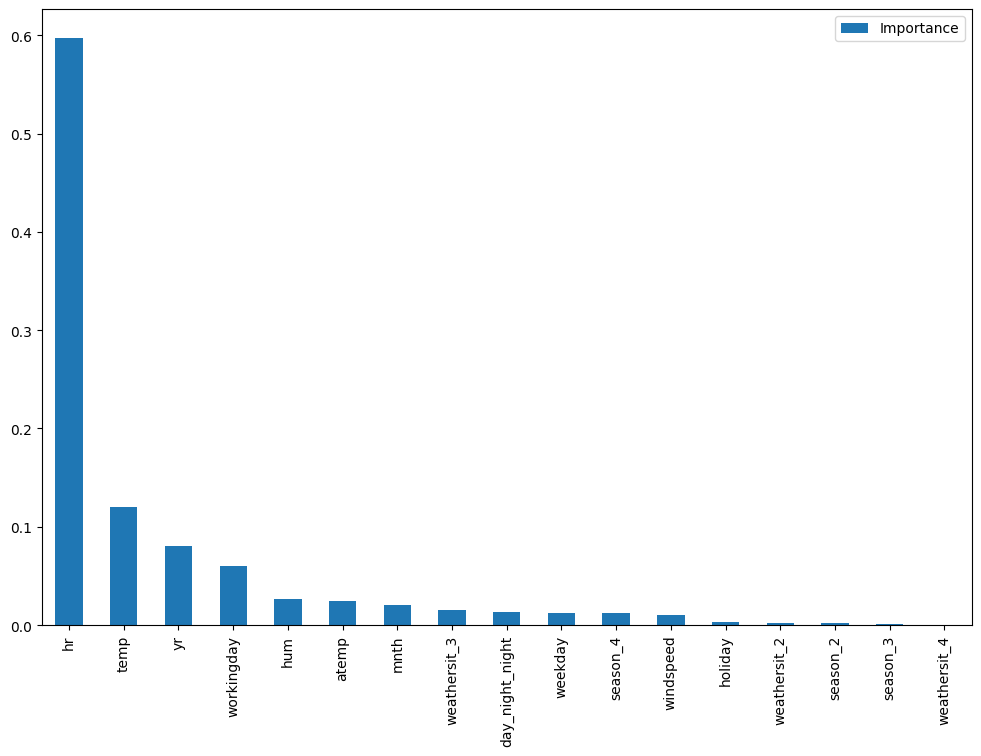

In [3]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
                                columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(12, 8))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Updated Mean Squared Error: {mse}')
print(f'Updated R-squared: {r2}')


**2. Replace the OneHotEncoder with TargetEncoder for categorical variables.
Evaluate how this change impacts the model's performance compared to one-hot
encoding.**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
Mean Squared Error with TargetEncoder: 1778.720113745503
R-squared with TargetEncoder: 0.943827664360777


<Axes: >

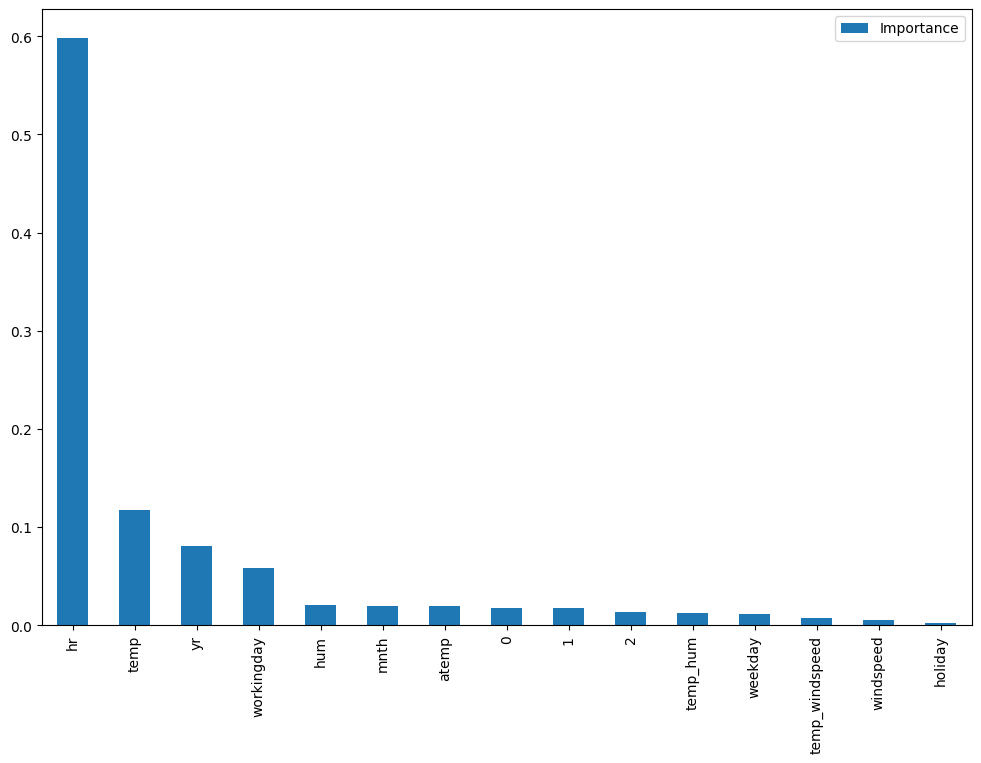

In [4]:
# Install the necessary libraries
!pip install ucimlrepo category_encoders

from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from category_encoders import TargetEncoder

# Fetch dataset
bike_sharing = fetch_ucirepo(id=275)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# Load and preprocess the dataset
df = pd.read_csv('hour.csv')
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
df.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')

# Create interaction features
df['temp_hum'] = df['temp'] * df['hum']
df['temp_windspeed'] = df['temp'] * df['windspeed']

# Define numerical and categorical features
numerical_features = ['temp', 'hum', 'windspeed', 'temp_hum', 'temp_windspeed']
categorical_features = ['season', 'weathersit', 'day_night']

# Ensure categorical features are present in the DataFrame
for feature in categorical_features:
    if feature not in df.columns:
        raise KeyError(f"Categorical column '{feature}' is missing from the DataFrame!")

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Define pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', TargetEncoder())
])

# Apply transformations
X = df.drop(columns=['cnt'])
y = df['cnt']

# Transform numerical features
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])

# Transform categorical features using TargetEncoder
X_encoded = categorical_pipeline.fit_transform(X[categorical_features], y)
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

# Convert all column names to strings in the transformed DataFrame
X.columns = X.columns.astype(str)

# Split the data (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
mse_target_encoder = mean_squared_error(y_test, y_pred)
r2_target_encoder = r2_score(y_test, y_pred)

print(f'Mean Squared Error with TargetEncoder: {mse_target_encoder}')
print(f'R-squared with TargetEncoder: {r2_target_encoder}')

# Feature importances
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(12, 8))


**3. Train LinearRegressor:
a. Using the package,
b. Write/Train it by scratch following the steps of a linear regressor.
Compare their performance using metrics like Mean Squared Error (MSE)
and R-squared.**

In [5]:
from sklearn.linear_model import LinearRegression

# Define and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error with Linear Regression (sklearn): {mse_linear}')
print(f'R-squared with Linear Regression (sklearn): {r2_linear}')


Mean Squared Error with Linear Regression (sklearn): 14974.133860641094
R-squared with Linear Regression (sklearn): 0.5271138687719741


In [6]:
import numpy as np

# Add a column of ones to X for the intercept term
X_train_ones = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_ones = np.c_[np.ones(X_test.shape[0]), X_test]

# Compute coefficients using the Normal Equation
X_train_T_X_train = np.dot(X_train_ones.T, X_train_ones)
X_train_T_y_train = np.dot(X_train_ones.T, y_train)
coefficients = np.linalg.inv(X_train_T_X_train).dot(X_train_T_y_train)

# Predict using the calculated coefficients
y_pred_scratch = np.dot(X_test_ones, coefficients)

# Evaluate performance
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print(f'Mean Squared Error with Linear Regression (scratch): {mse_scratch}')
print(f'R-squared with Linear Regression (scratch): {r2_scratch}')


Mean Squared Error with Linear Regression (scratch): 14974.133860641105
R-squared with Linear Regression (scratch): 0.5271138687719737


**We observe that the R - squared value of the scratch model is lower.**

**4. Save the screenshot of MLpipeline.**

In [13]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Define the final pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', TargetEncoder())
])

final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Configure pipeline display to 'diagram'
set_config(display='diagram')

# Display the pipeline
html_representation = HTML(final_pipeline._repr_html_())

# Save the HTML representation as an image
display(html_representation)


(-0.5, 338.5, 341.5, -0.5)

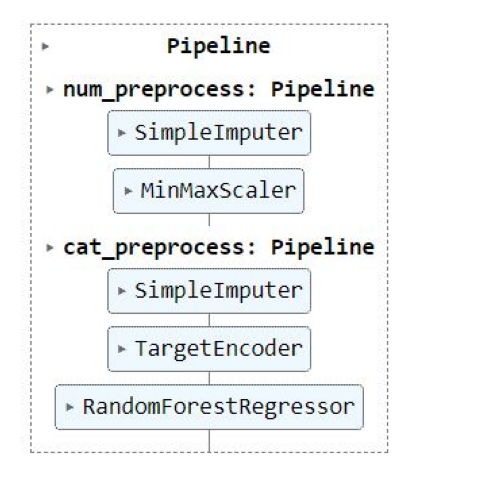

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the specified path
img = mpimg.imread('/content/assignment2_pipeline.JPG')

# Display the image
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')